In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# column def

- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）
- Pclass – チケットクラス
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- Parch – タイタニックに同乗している親/子供の数
- Ticket – チケット番号
- Fare – 料金
- Cabin – 客室番号
- Embarked – 出港地（タイタニックへ乗った港）

# Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton


## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
titanic = pd.read_csv('../input/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
titanic.isnull().any().any()

True

In [6]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic[titanic.isnull().any(1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


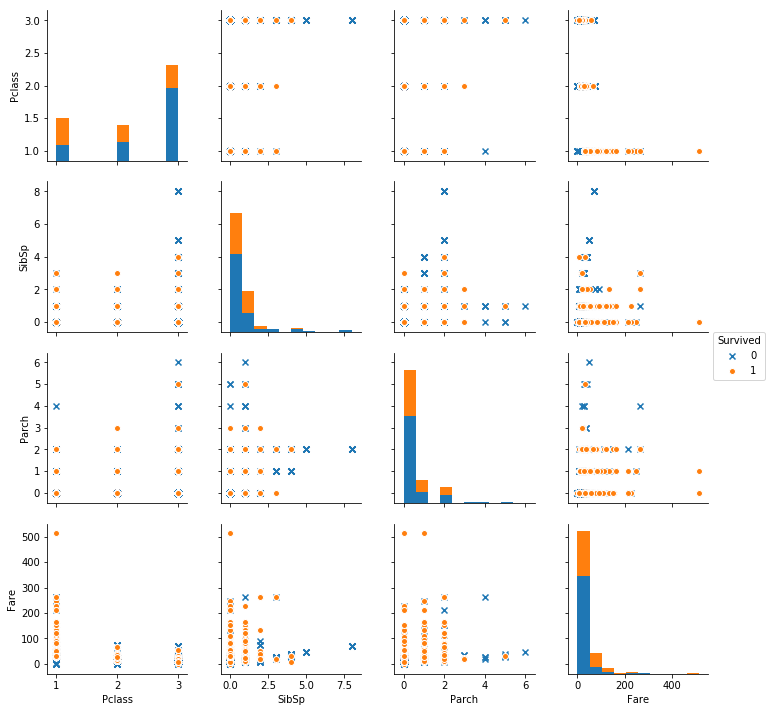

In [11]:
sns.pairplot(titanic, hue="Survived", markers=['x', 'o'], 
             vars=["Pclass", 'SibSp', 'Parch', 'Fare'])

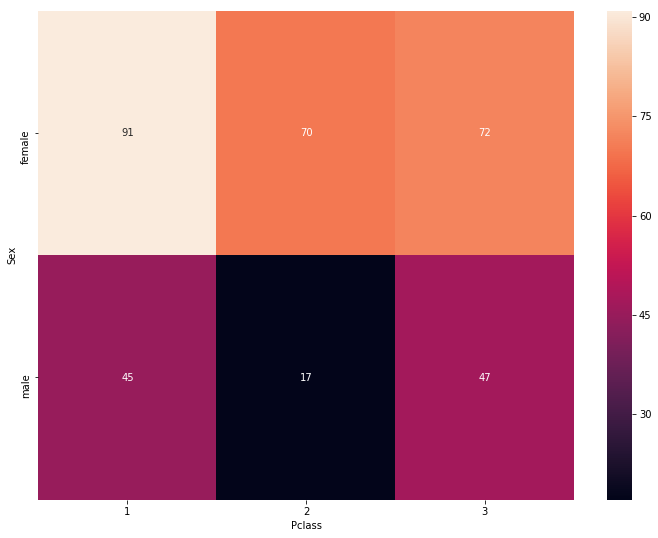

In [12]:
df_titanic_pivot = pd.pivot_table(data=titanic, values="Survived", 
                                 columns = 'Pclass', index='Sex', aggfunc=np.sum)
plt.figure(figsize=(12, 9))
sns.heatmap(df_titanic_pivot, annot=True)

In [13]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sjostedt, Mr. Ernst Adolf",male,1601,B96 B98,S
freq,1,577,7,4,644


In [14]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sjostedt, Mr. Ernst Adolf",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
titanic.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sjostedt, Mr. Ernst Adolf",male,1601,B96 B98,S
freq,1,577,7,4,644


# Import again as forked notebook

In [17]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

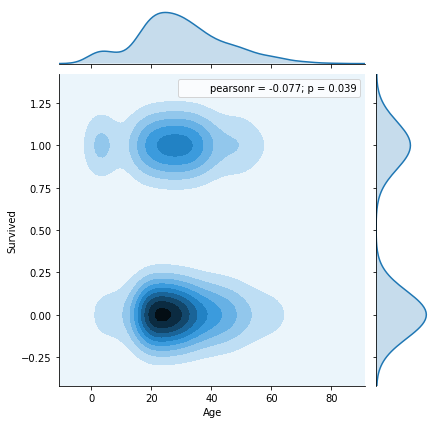

In [18]:
sns.jointplot(x="Age", y="Survived", data=train_df, kind="kde")

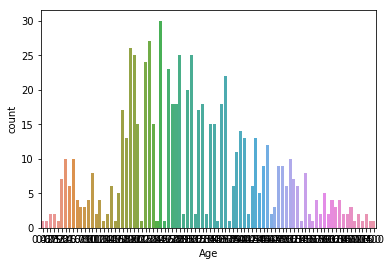

In [19]:
sns.countplot(train_df["Age"])

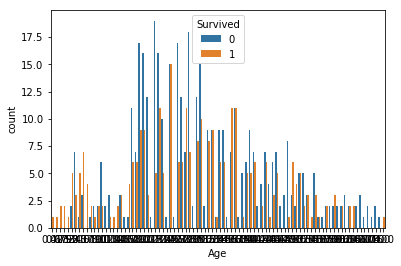

In [20]:
sns.countplot(x="Age", data=train_df, hue="Survived", )

/home/yuki/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


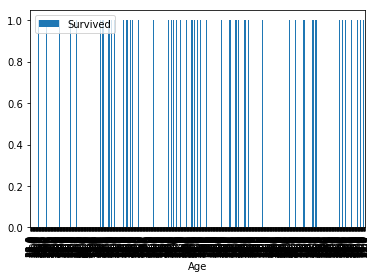

In [21]:
train_df.plot.bar(x="Age", y=["Survived"])

In [22]:
train_df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
train_df.groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [24]:
train_df.groupby(["Pclass", "Sex"]).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [25]:
train_df.groupby(["Pclass"]).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

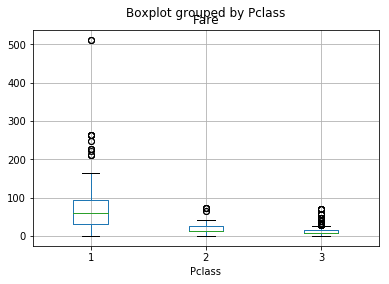

In [26]:
train_df.boxplot(column="Fare", by="Pclass")

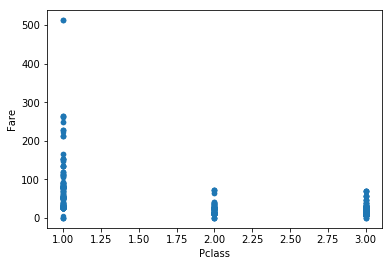

In [27]:
train_df.plot.scatter(x='Pclass', y='Fare')

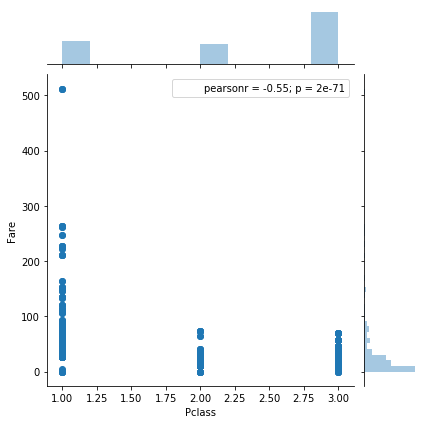

In [28]:
sns.jointplot(x="Pclass", y="Fare", data=train_df)

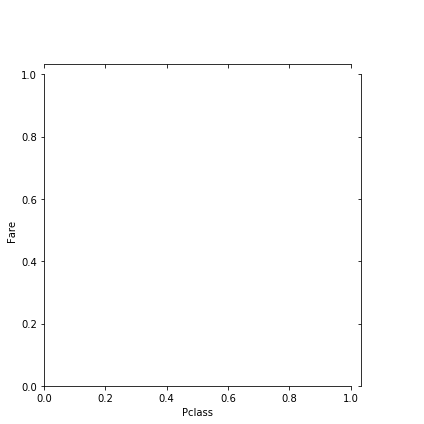

In [29]:
sns.JointGrid(x="Pclass", y="Fare", data=train_df)

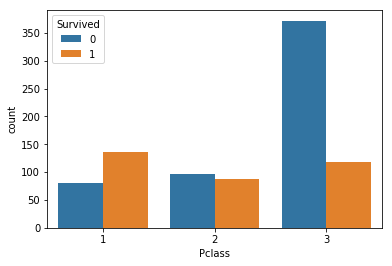

In [30]:
sns.countplot(x="Pclass", data=train_df, hue="Survived")

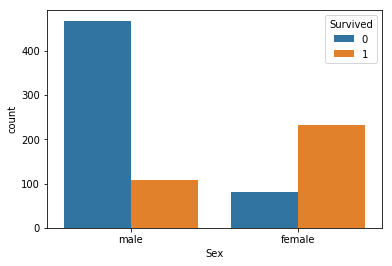

In [31]:
sns.countplot(x="Sex", data=train_df, hue="Survived")

In [32]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [33]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(
    by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [34]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [35]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [36]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [37]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [38]:
train_df.groupby(["Sex"]).Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [39]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(
by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(
by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [41]:
train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(
by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


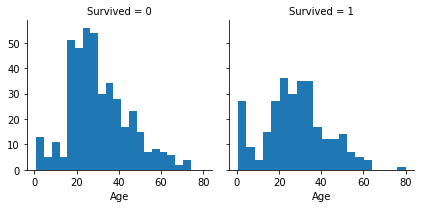

In [42]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, 'Age', bins=20)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

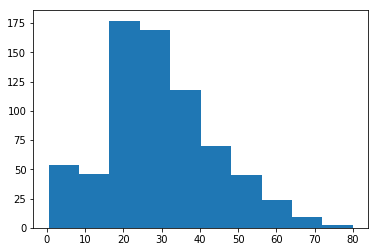

In [43]:
plt.hist(x=train_df.Age.dropna(), bins=10)

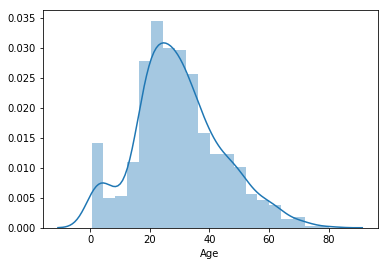

In [44]:
sns.distplot(train_df.Age.dropna())

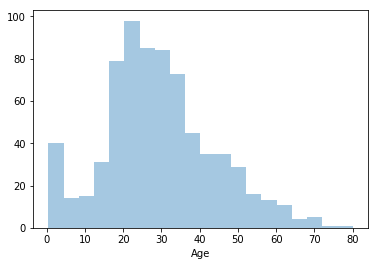

In [45]:
sns.distplot(train_df.Age.dropna(), kde=False)

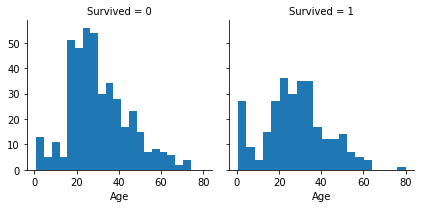

In [46]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, 'Age', bins=20)

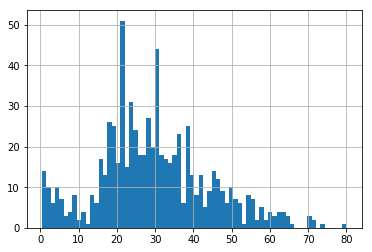

In [47]:
train_df["Age"].hist(bins=70)

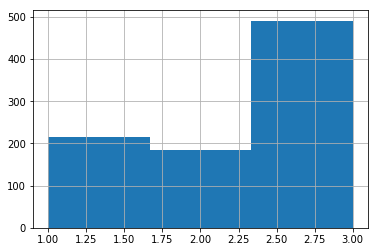

In [48]:
train_df["Pclass"].hist(bins=3)

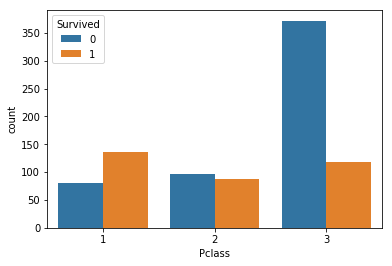

In [49]:
sns.countplot(train_df["Pclass"], hue=train_df["Survived"])

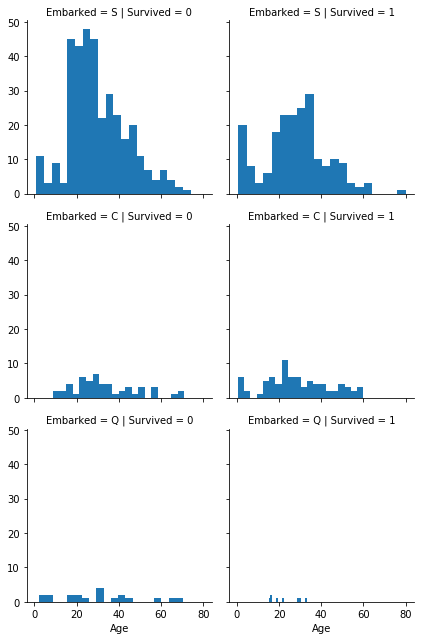

In [50]:
g = sns.FacetGrid(train_df, col="Survived", row="Embarked")
g.map(plt.hist, 'Age', bins=20)

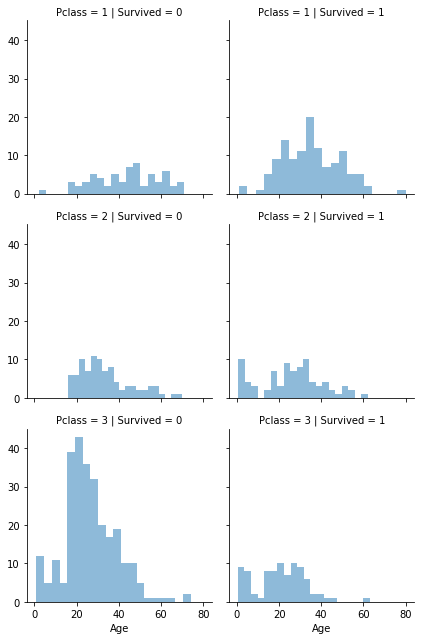

In [51]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, 'Age', bins=20, alpha=.5)


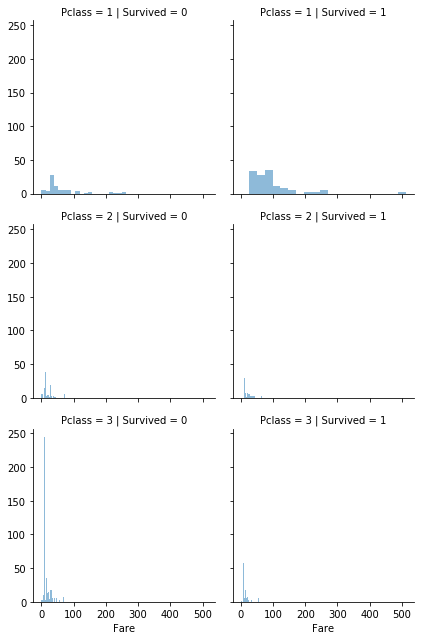

In [52]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, 'Fare', bins=20, alpha=.5)


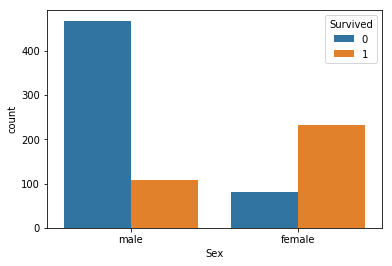

In [53]:
sns.countplot(train_df["Sex"], hue=train_df["Survived"])

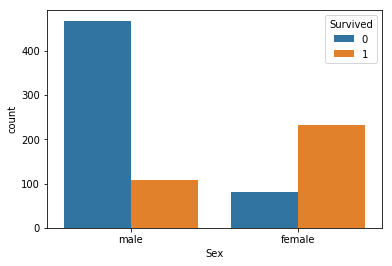

In [54]:
sns.countplot(x="Sex", hue="Survived", data=train_df)

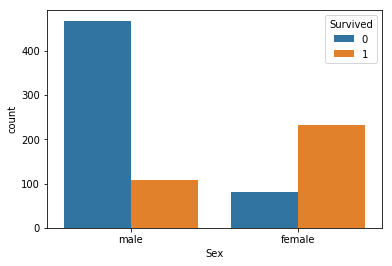

In [55]:
sns.countplot(x="Sex", hue="Survived", data=train_df)

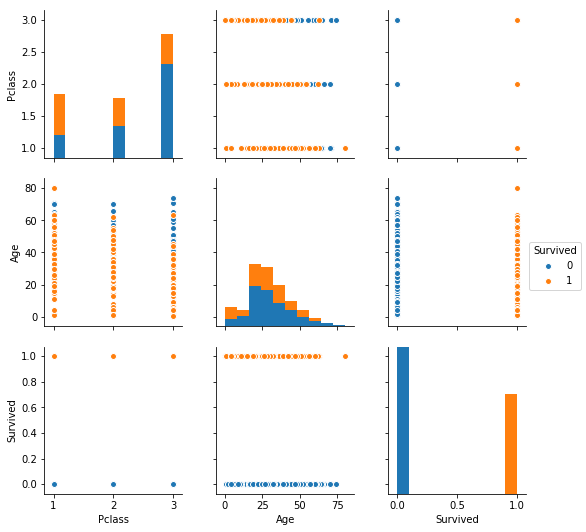

In [56]:
sns.pairplot(train_df[["Pclass", "Sex", "Age", "Embarked", "Survived"]].dropna(), hue="Survived")

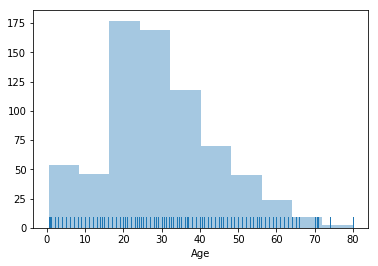

In [57]:
sns.distplot(train_df["Age"].dropna(), kde=False, rug=True, bins=10)

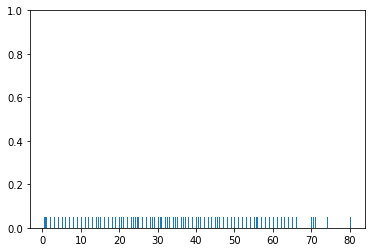

In [58]:
sns.rugplot(train_df["Age"])

In [59]:
train_df[train_df.Age >50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S


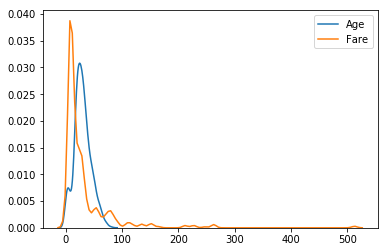

In [60]:
sns.kdeplot(train_df.Age.dropna())
sns.kdeplot(train_df.Fare.dropna())

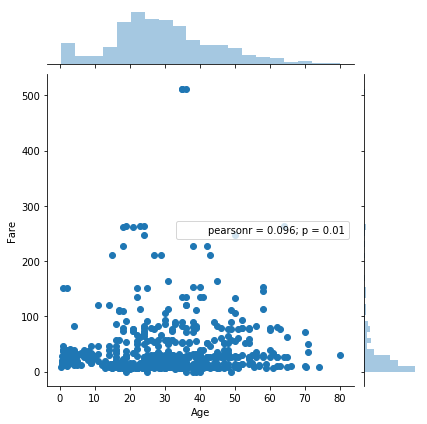

In [61]:
sns.jointplot(data=train_df, x="Age", y="Fare")

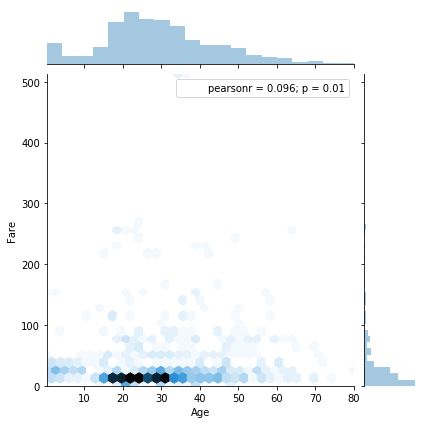

In [62]:
sns.jointplot(data=train_df, x="Age", y="Fare", kind="hex")

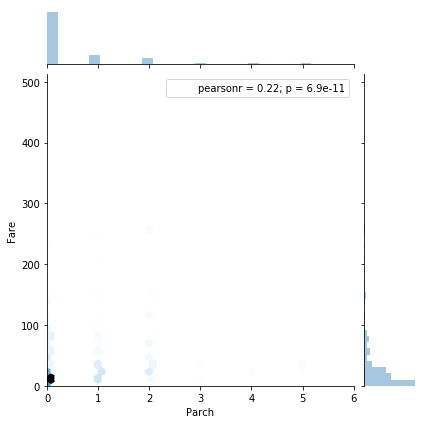

In [63]:
sns.jointplot(data=train_df, x="Parch", y="Fare", kind="hex")

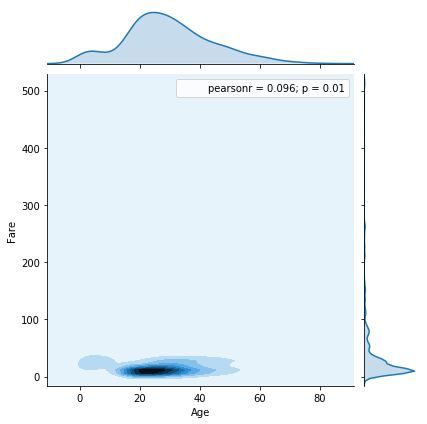

In [64]:
sns.jointplot(x="Age", y="Fare", data=train_df, kind="kde")

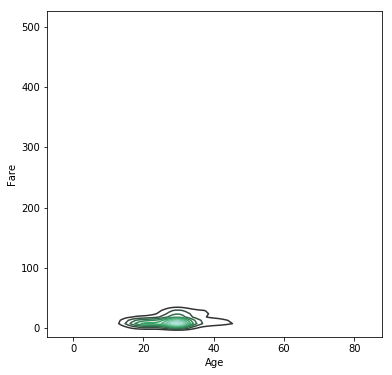

In [65]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(train_df["Age"].fillna(train_df["Age"].mean()), train_df["Fare"].fillna(train_df["Fare"].mean()), ax=ax)

In [66]:
train_df["Fare"].mean()

32.2042079685746

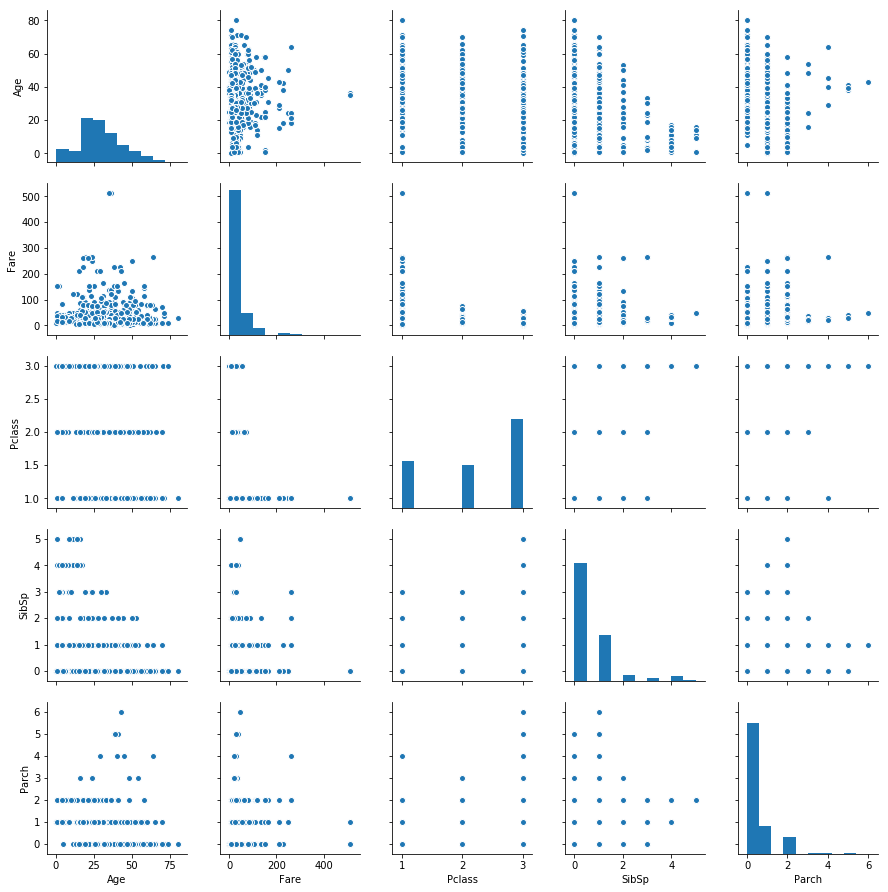

In [67]:
sns.pairplot(train_df[["Age", "Fare", "Pclass", "SibSp", "Parch"]].dropna(0))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/yuki/.local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


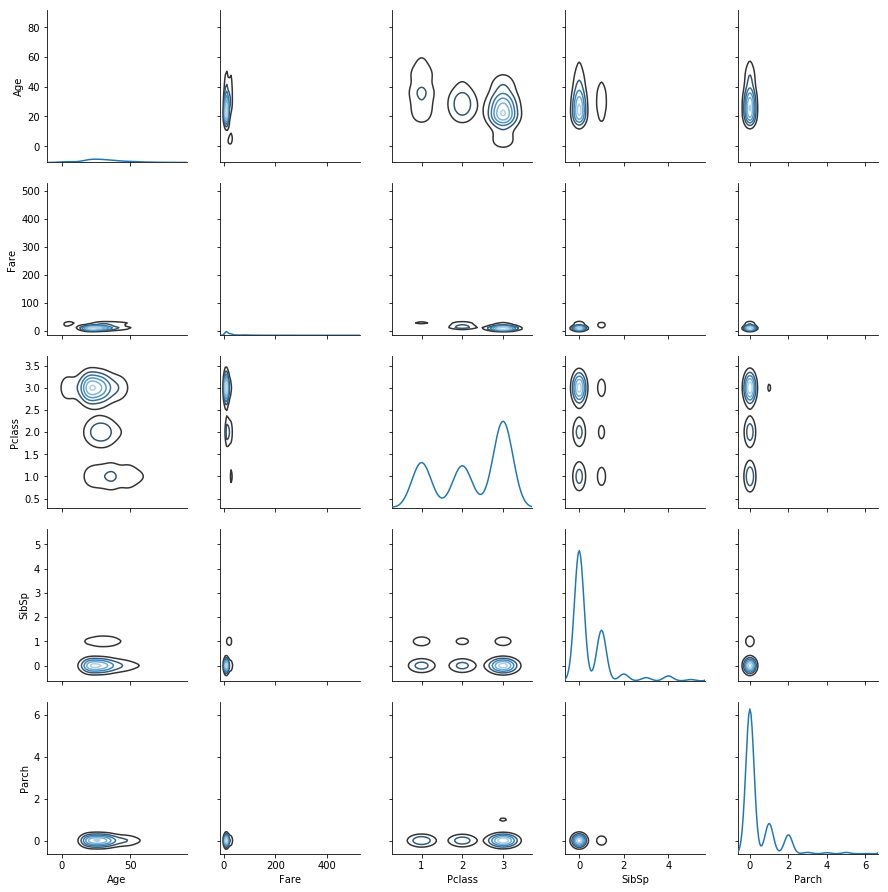

In [68]:
g = sns.PairGrid(train_df[["Age", "Fare", "Pclass", "SibSp", "Parch"]].dropna(0))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [69]:
train_df.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sjostedt, Mr. Ernst Adolf",male,1601,B96 B98,S
freq,1,577,7,4,644


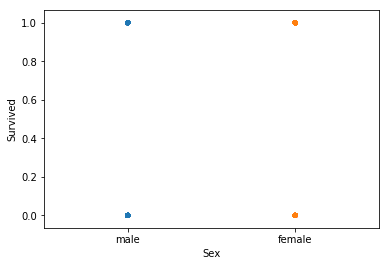

In [70]:
sns.stripplot(data=train_df, x="Sex", y="Survived")

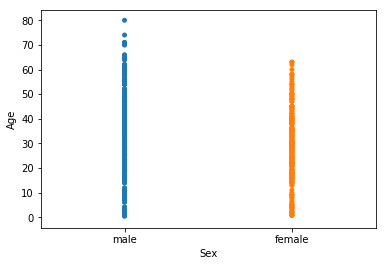

In [71]:
sns.stripplot(data=train_df, x="Sex", y="Age")

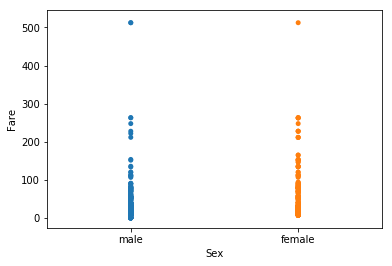

In [72]:
sns.stripplot(data=train_df, x="Sex", y="Fare")

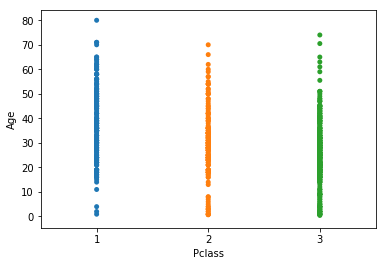

In [73]:
sns.stripplot(data=train_df, x="Pclass", y="Age")

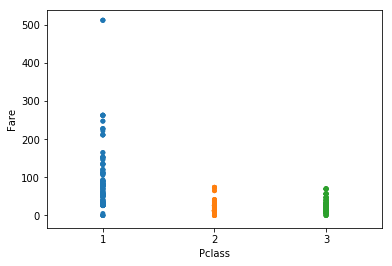

In [74]:
sns.stripplot(data=train_df, x="Pclass", y="Fare")

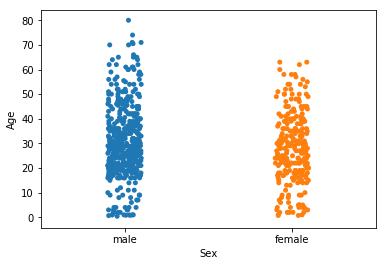

In [75]:
sns.stripplot(x="Sex", y="Age", data=train_df, jitter=True)

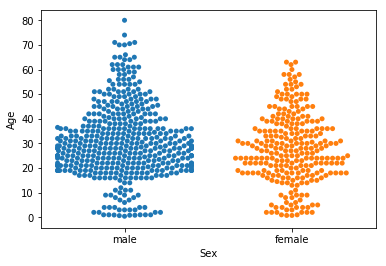

In [76]:
sns.swarmplot(x="Sex", y="Age", data=train_df)

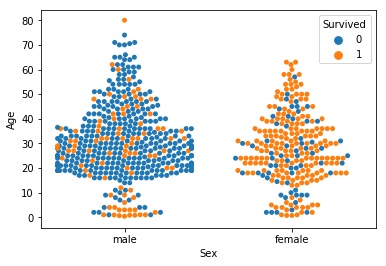

In [77]:
sns.swarmplot(x="Sex", y="Age", data=train_df, hue="Survived")

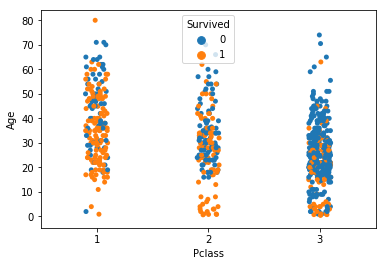

In [78]:
sns.stripplot(hue="Survived", x="Pclass", y="Age", data=train_df, jitter=True)

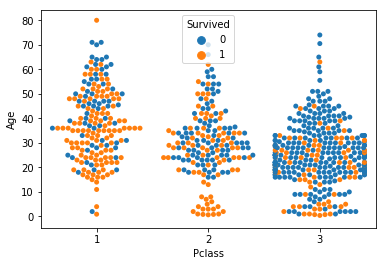

In [79]:
sns.swarmplot(x="Pclass", y="Age", data=train_df, hue="Survived")

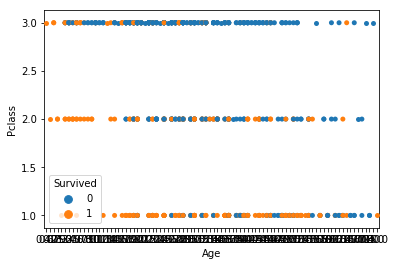

In [80]:
sns.stripplot(x="Age", y="Pclass", data=train_df, hue="Survived")

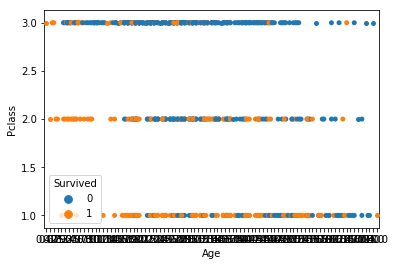

In [81]:
sns.swarmplot(x="Age", y="Pclass", data=train_df, hue="Survived")
# バラけないのは何故かと思ったが、yがintだからcategoryと認識されなかったからか。
# 下の結果、y="Sex"にしたときはバラけるからきっとそうだ

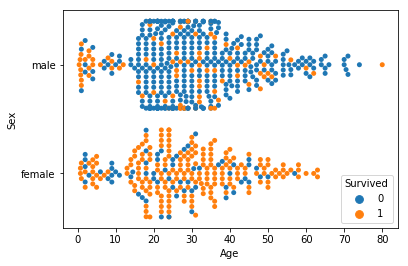

In [82]:
sns.swarmplot(x="Age", y="Sex", data=train_df, hue="Survived")

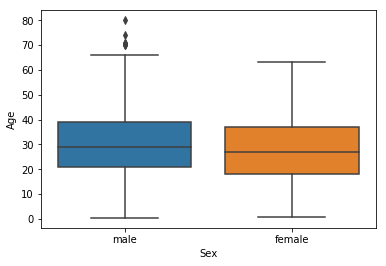

In [83]:
sns.boxplot(x="Sex", y="Age", data=train_df)

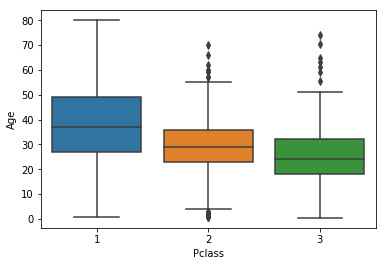

In [84]:
sns.boxplot(x="Pclass", y="Age", data=train_df)

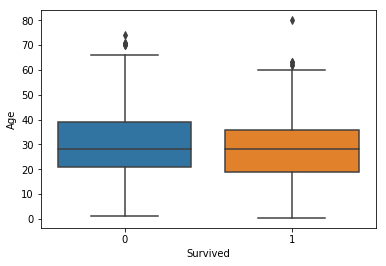

In [85]:
sns.boxplot(x="Survived", y="Age", data=train_df)

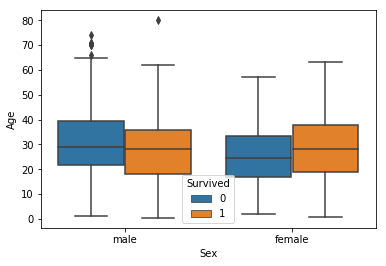

In [86]:
sns.boxplot(x="Sex", y="Age", hue="Survived", data=train_df)

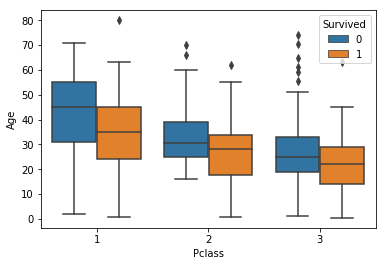

In [87]:
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=train_df)

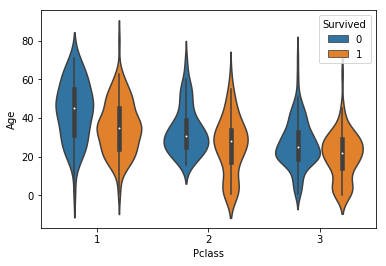

In [88]:
sns.violinplot(x="Pclass", y="Age", data=train_df, hue="Survived")

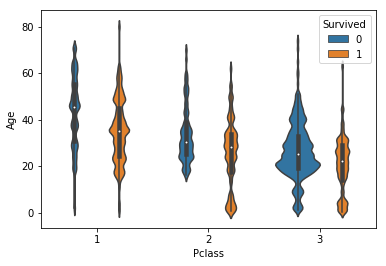

In [89]:
sns.violinplot(x="Pclass", y="Age", data=train_df, hue="Survived", 
               bw=.1, scale="count", scale_hue=False)

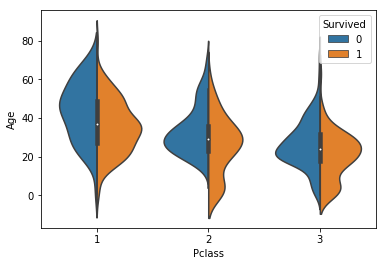

In [90]:
sns.violinplot(x="Pclass", y="Age", data=train_df, hue="Survived", split=True)

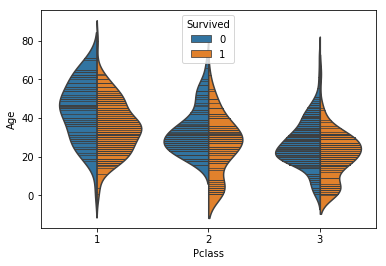

In [91]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True,
              inner="stick")

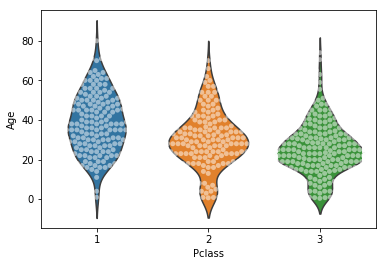

In [92]:
sns.violinplot(x="Pclass", y="Age", data=train_df,
              inner=None)
sns.swarmplot(x="Pclass", y="Age", data=train_df, color="w", alpha=0.5)

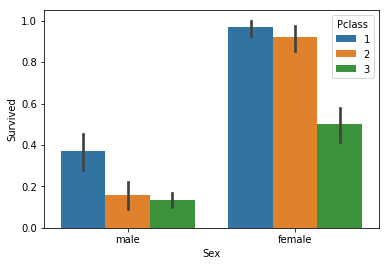

In [93]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df)

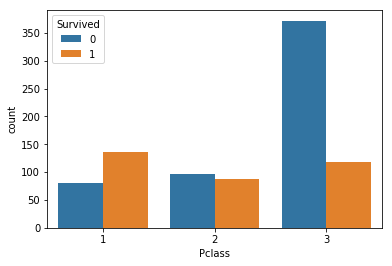

In [94]:
sns.countplot(data=train_df, x="Pclass", hue="Survived")

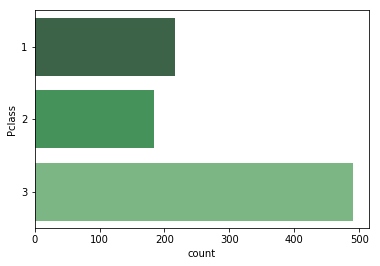

In [95]:
sns.countplot(y="Pclass", data=train_df, palette="Greens_d", 
              )

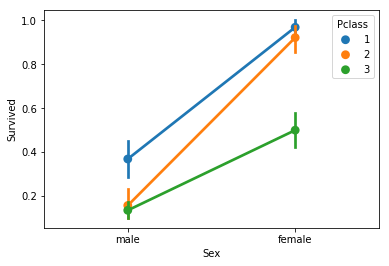

In [96]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train_df)

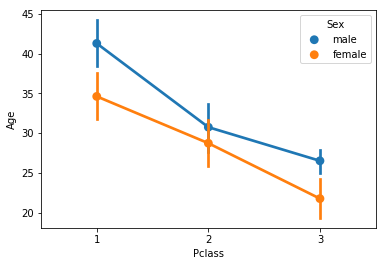

In [97]:
sns.pointplot(x="Pclass", y="Age", hue="Sex", data=train_df)

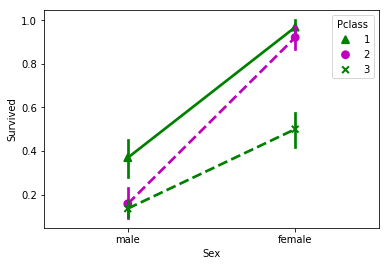

In [98]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train_df,
             markers=["^", "o", "x"], linestyles=["-", "--", "--"],
             palette={1:"g", 2:"m", 3:"g"})

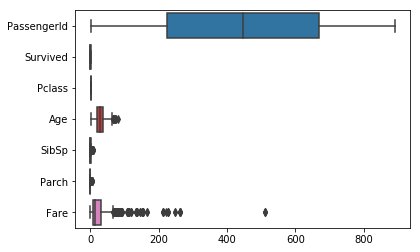

In [99]:
sns.boxplot(data=train_df, orient="h")

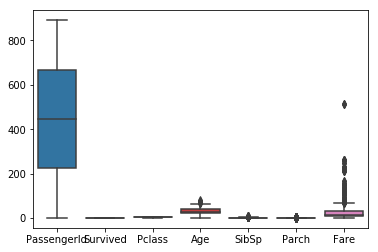

In [100]:
sns.boxplot(data=train_df)

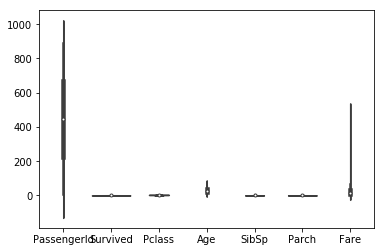

In [101]:
sns.violinplot(data=train_df)

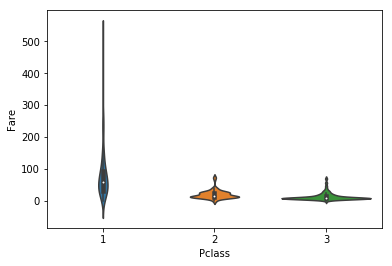

In [102]:
sns.violinplot(x=train_df.Pclass, y=train_df.Fare)

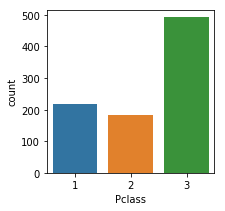

In [103]:
f, ax = plt.subplots(figsize=(3,3))
sns.countplot(x="Pclass", data=train_df)

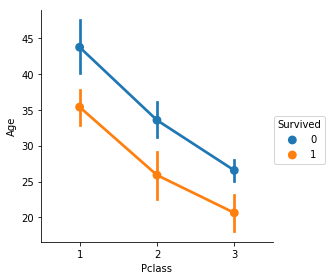

In [104]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", data=train_df)

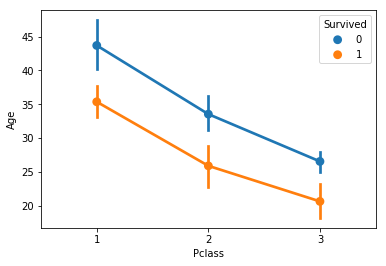

In [105]:
sns.pointplot(x="Pclass", y="Age", hue="Survived", data=train_df)

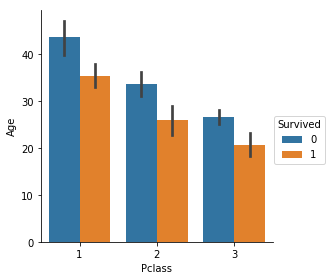

In [106]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", data=train_df, kind="bar")

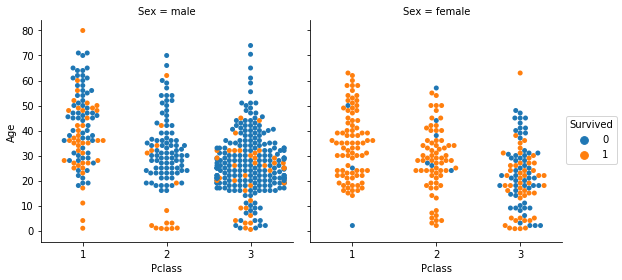

In [107]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", data=train_df, col="Sex", kind="swarm")

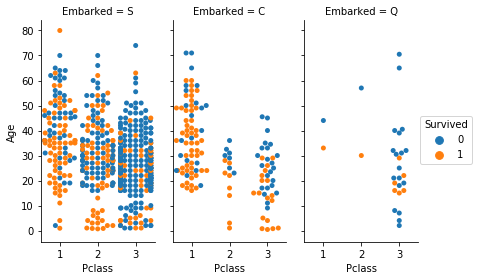

In [108]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", data=train_df, col="Embarked", kind="swarm",
              size=4, aspect=.5)

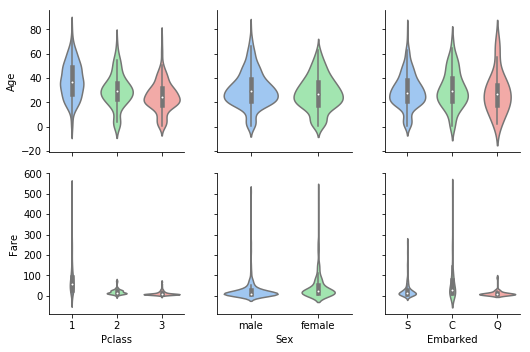

In [109]:
g = sns.PairGrid(train_df, 
                x_vars=["Pclass", "Sex", "Embarked"],
                y_vars=["Age", "Fare"])
g.map(sns.violinplot, palette="pastel")

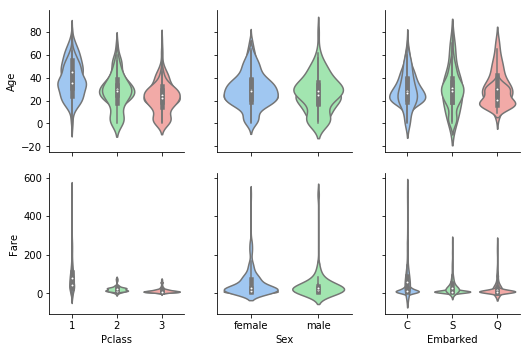

In [110]:
g = sns.PairGrid(train_df, 
                x_vars=["Pclass", "Sex", "Embarked"],
                y_vars=["Age", "Fare"], hue="Survived")
g.map(sns.violinplot, palette="pastel")

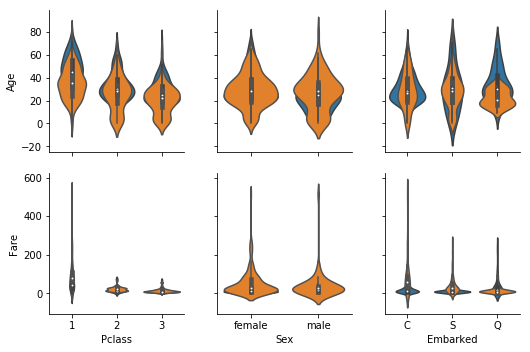

In [111]:
g = sns.PairGrid(train_df, 
                x_vars=["Pclass", "Sex", "Embarked"],
                y_vars=["Age", "Fare"], hue="Survived")
g.map(sns.violinplot)

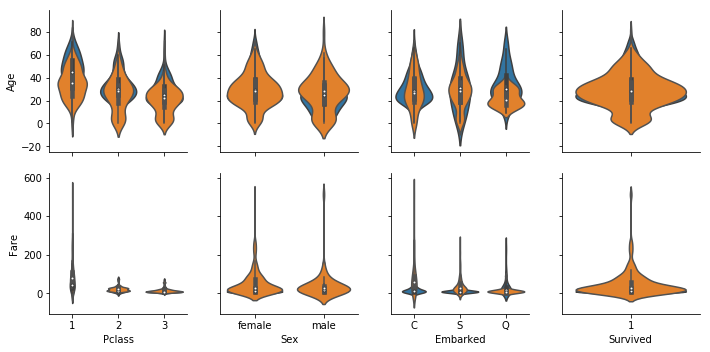

In [112]:
g = sns.PairGrid(train_df, 
                x_vars=["Pclass", "Sex", "Embarked", "Survived"],
                y_vars=["Age", "Fare"], hue="Survived")
g.map(sns.violinplot, split=True)

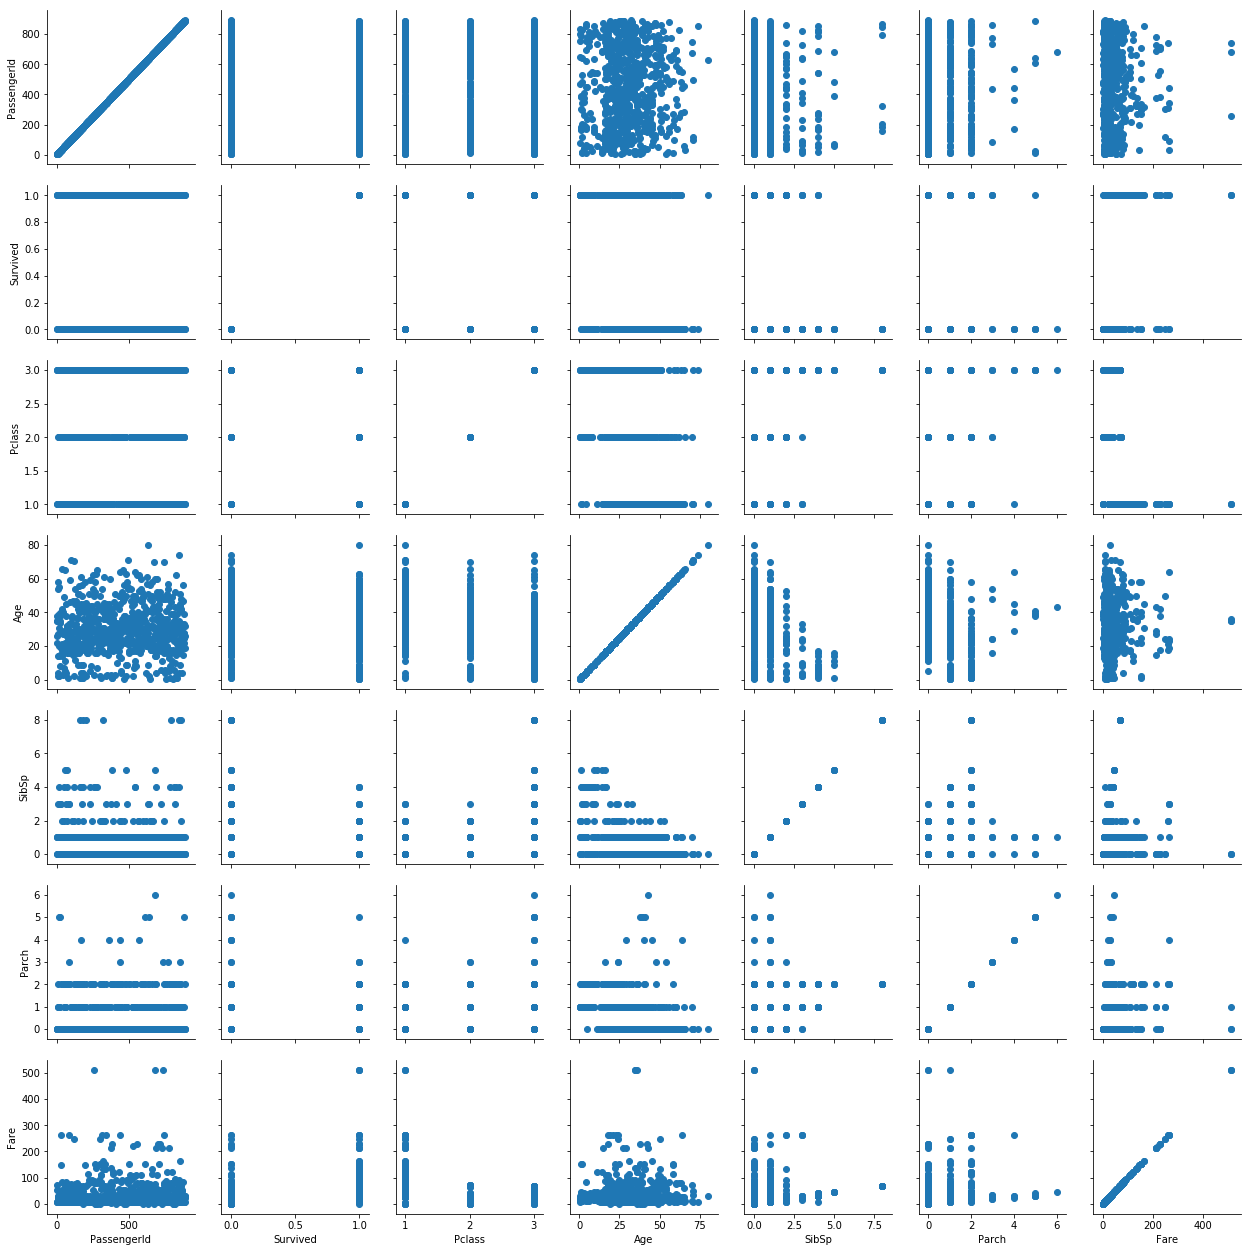

In [113]:
g = sns.PairGrid(train_df)
g = g.map(plt.scatter)

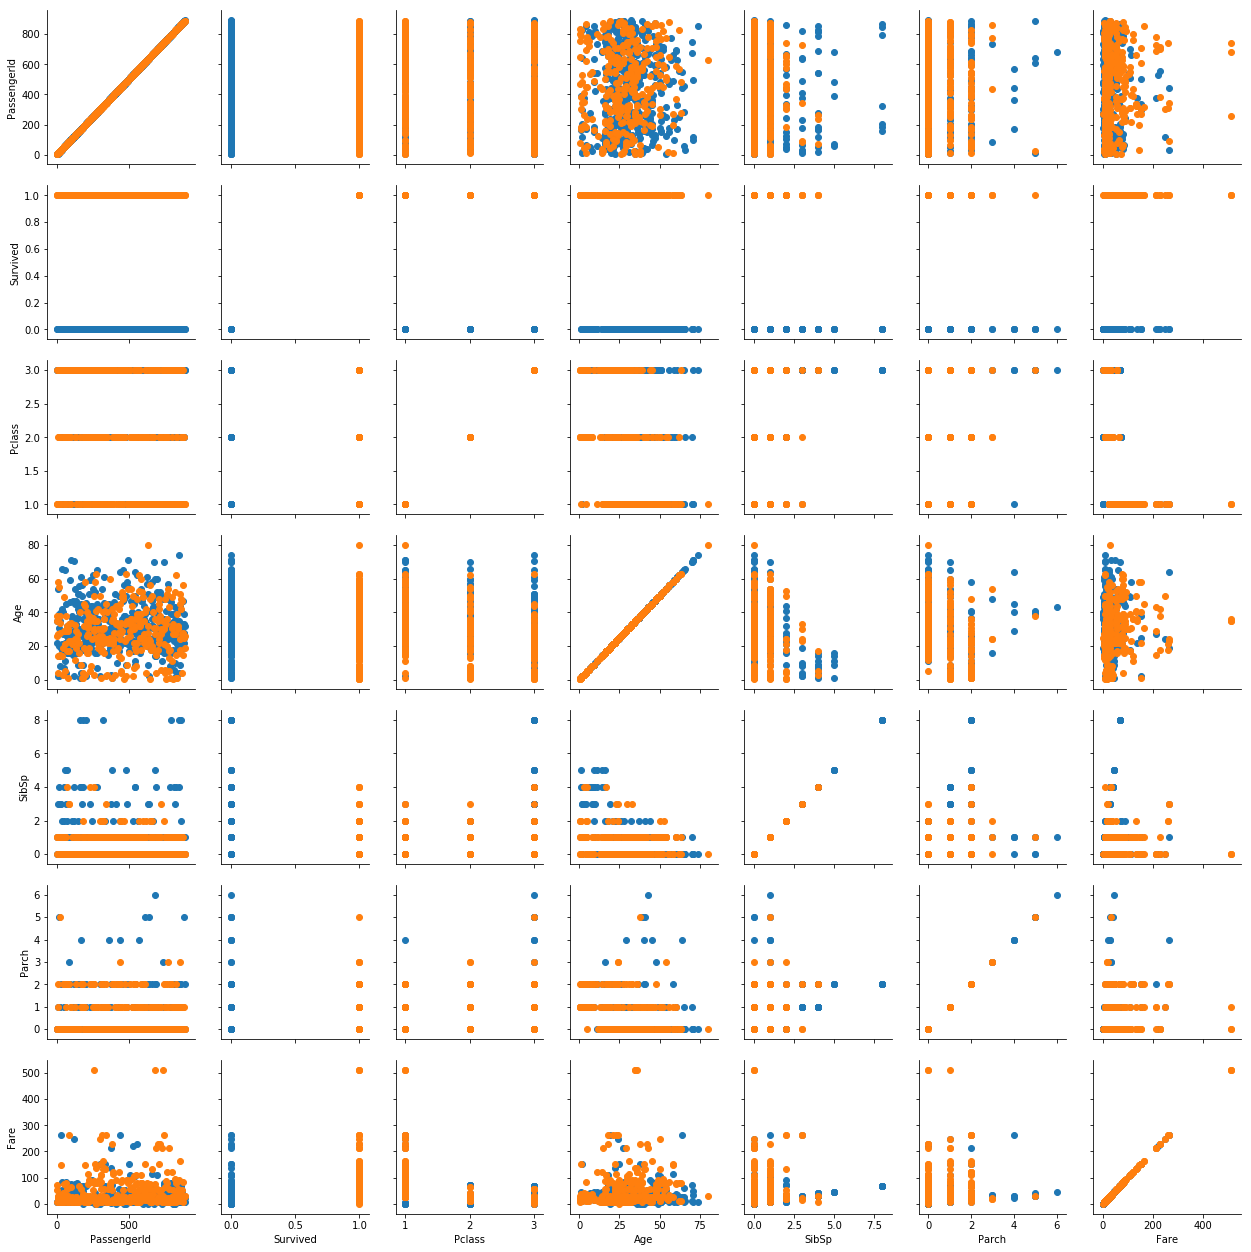

In [114]:
g = sns.PairGrid(train_df, hue="Survived")
g = g.map(plt.scatter)

# back to kaggle example

https://www.kaggle.com/startupsci/titanic-data-science-solutions

## Analyze by visualizing data

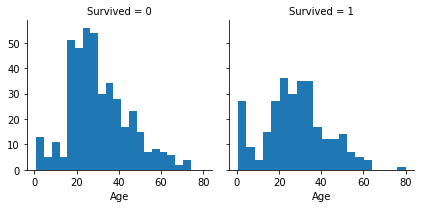

In [115]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20)

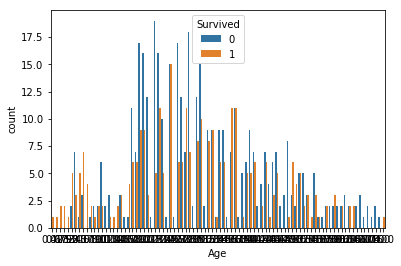

In [116]:
sns.countplot(x="Age", hue="Survived", data=train_df)

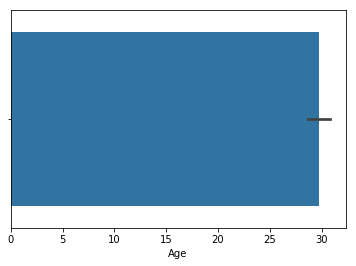

In [117]:
sns.barplot(x="Age", data=train_df, hue="Survived")

## Correlating numerical and ordinal features

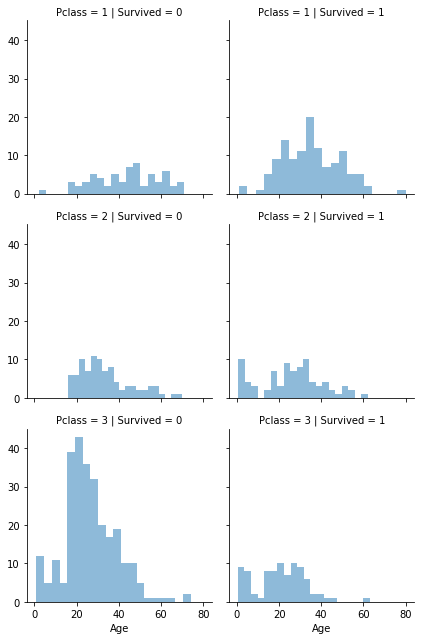

In [120]:
grid = sns.FacetGrid(col="Survived", row="Pclass", data=train_df)
grid.map(plt.hist, "Age", alpha=.5, bins=20)

/home/yuki/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


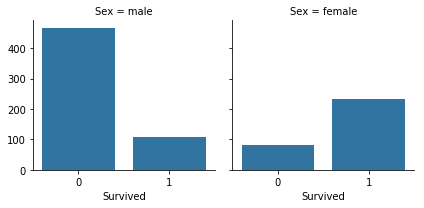

In [127]:
grid = sns.FacetGrid(col="Sex", data=train_df)
grid.map(sns.countplot, "Survived")


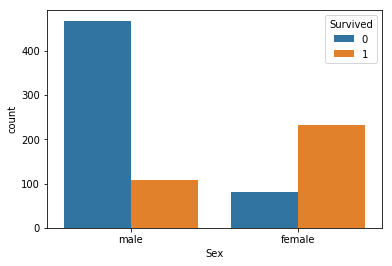

In [121]:
sns.countplot(x="Sex", hue="Survived", data=train_df)

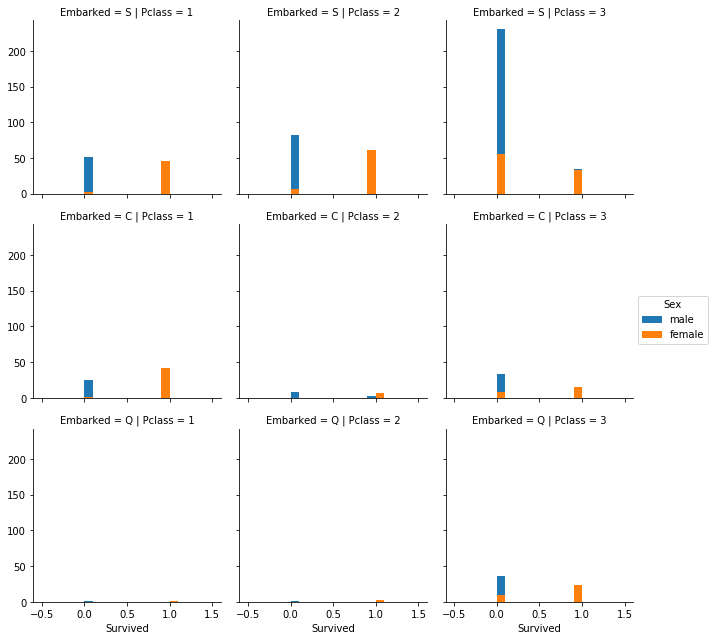

In [144]:
grid = sns.FacetGrid(col="Pclass", row="Embarked", hue="Sex", data=train_df)
grid.map(plt.hist, "Survived")
grid.add_legend()

/home/yuki/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


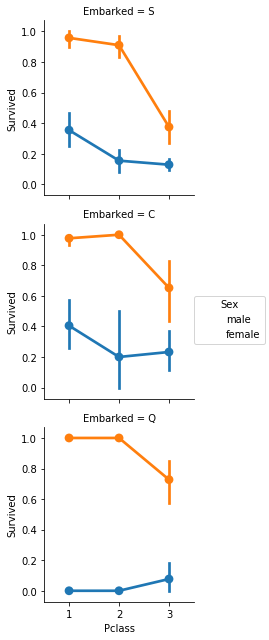

In [133]:
grid = sns.FacetGrid(row="Embarked", hue="Sex", data=train_df)
grid.map(sns.pointplot, "Pclass", "Survived")
grid.add_legend()

/home/yuki/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/yuki/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


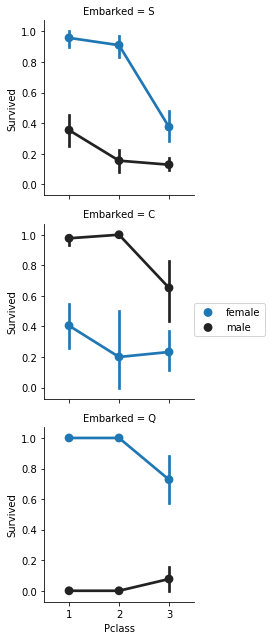

In [134]:
grid = sns.FacetGrid(row="Embarked", data=train_df)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex")
grid.add_legend()

In [140]:
train_df[train_df.Sex=="male"].Sex.count()

577